# Multivariate Time Series using LSTM

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mp
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

mp.rcParams['figure.figsize'] = (12,6)
mp.rcParams['axes.grid'] = False

In [70]:
df = pd.read_csv('energydata_complete.csv')
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


### Data is collected every 10 minutes

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

### Converting date column into datetime column

In [72]:
df['date'] = pd.to_datetime(df['date'])

### Plotting 

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

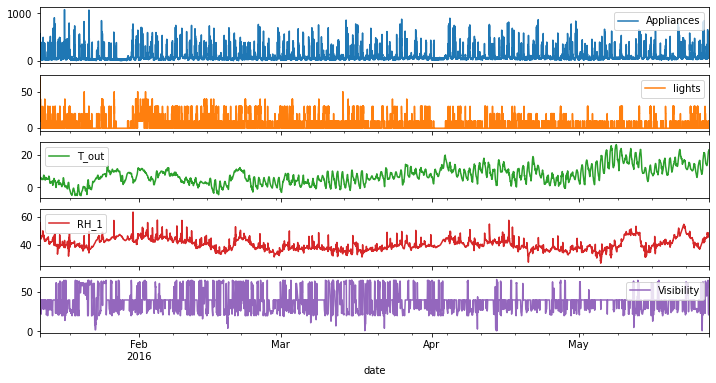

In [11]:
df.set_index('date')[['Appliances', 'lights', 'T_out', 'RH_1', 'Visibility']].plot(subplots=True)

# Taking few columns for the multivariate analysis

In [73]:
df_input = df[['Appliances', 'T_out', 'RH_1', 'Visibility']]
df_input

,Appliances,T_out,RH_1,Visibility
0,60,6.600000,47.596667,63.000000
1,60,6.483333,46.693333,59.166667
2,50,6.366667,46.300000,55.333333
3,50,6.250000,46.066667,51.500000
4,60,6.133333,46.333333,47.666667
...,...,...,...,...
19730,100,22.733333,46.560000,23.666667
19731,90,22.600000,46.500000,24.500000
19732,270,22.466667,46.596667,25.333333
19733,420,22.333333,46.990000,26.166667


In [74]:
df_input.describe()

,Appliances,T_out,RH_1,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,7.411665,40.259739,38.330834
std,102.524891,5.317409,3.979299,11.794719
min,10.000000,-5.000000,27.023333,1.000000
25%,50.000000,3.666667,37.333333,29.000000
50%,60.000000,6.916667,39.656667,40.000000
75%,100.000000,10.408333,43.066667,40.000000
max,1080.000000,26.100000,63.360000,66.000000


### Filtering the data where Appliances > 500

In [75]:
df_input[df_input['Appliances']>500]

,Appliances,T_out,RH_1,Visibility
11,580,5.983333,46.396667,40.000000
314,520,2.900000,41.530000,36.333333
392,550,2.033333,43.433333,40.000000
393,690,2.100000,43.766667,40.000000
394,620,2.166667,43.693333,40.000000
...,...,...,...,...
19586,600,20.833333,44.066667,40.000000
19587,520,20.900000,43.366667,40.000000
19684,580,15.900000,47.226667,61.000000
19685,660,16.100000,47.693333,61.000000


### Since our data is having the outliers so ... standard scaler wont account to outlier. Better to shift the mean and std dev. so use Min Max Scaler

In [76]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)
data_scaled

array([[0.04672897, 0.37299035, 0.56618659, 0.95384615],
       [0.04672897, 0.36923901, 0.54132648, 0.89487179],
       [0.03738318, 0.36548767, 0.53050179, 0.83589744],
       ...,
       [0.24299065, 0.88317256, 0.53866618, 0.37435897],
       [0.38317757, 0.87888532, 0.54949087, 0.38717949],
       [0.39252336, 0.87459807, 0.53875791, 0.4       ]])

### So here the appliance column is also my Feature (1st column ) ... and also in my Target column

In [77]:
features = data_scaled
target = data_scaled[:,0]

In [79]:
# HERE THE WINDOW LENGTH IS 2 ... MEANS WE ARE TAKING 20 mins OF DATA HERE
# Just a Demo of Time Series Generator in Tensorflow

TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0] # SO HERE 2 INPUT AND 1 OUTPUT IS SHOWING

(array([[[0.04672897, 0.37299035, 0.56618659, 0.95384615],
         [0.04672897, 0.36923901, 0.54132648, 0.89487179]]]),
 array([0.03738318]))

# Train-Test Split ... just make sure shuffle is False bcoz Order is imp in Time Series

In [80]:
x_train, x_test, y_train, y_Test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle=False)

In [82]:
print(x_train.shape, x_test.shape) # Checking the shape

(15788, 4) (3947, 4)


In [83]:
win_length =720 # 6 DATA POINTS IN 1 hr ... SO TAKING 5 DAYS OF DATA... 6*24*5
batch_size = 32
num_features = 4 # SO YOU ARE CONSIDERING 4 FEATURES IN TOTAL

In [85]:
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_Test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [86]:
train_generator

In [88]:
train_generator[0] # It will contain 32 per batch... 720 TOTAL OBSERVATIONS ... and each obervation contain 4 features

(array([[[0.04672897, 0.37299035, 0.56618659, 0.95384615],
         [0.04672897, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.36548767, 0.53050179, 0.83589744],
         ...,
         [0.06542056, 0.25241158, 0.31584258, 0.79230769],
         [0.05607477, 0.23901393, 0.31309054, 0.72820513],
         [0.06542056, 0.22561629, 0.31107238, 0.66410256]],
 
        [[0.04672897, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.36173633, 0.52408036, 0.77692308],
         ...,
         [0.05607477, 0.23901393, 0.31309054, 0.72820513],
         [0.06542056, 0.22561629, 0.31107238, 0.66410256],
         [0.06542056, 0.21221865, 0.30923768, 0.6       ]],
 
        [[0.03738318, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.36173633, 0.52408036, 0.77692308],
         [0.04672897, 0.35798499, 0.53141914, 0.71794872],
         ...,
         [0.06542056, 0.22561629, 0.31107238, 0.66410256],
        

# Model Architecture

In [89]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape=(win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))

model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(1))


In [91]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 720, 128)          68096     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 720, 128)          0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 720, 128)          131584    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 720, 128)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 720, 128)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)               

In [44]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min')

model.compile(loss = tf.losses.MeanSquaredError(), 
            optimizer=tf.optimizers.Adam(),
             metrics=[tf.metrics.MeanAbsoluteError()])
history = model.fit(train_generator, epochs=50,
                             validation_data=test_generator,
                             shuffle=False,
                             callbacks=[early_stopping])



  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 471 steps, validate for 101 steps
Epoch 1/50
471/471 [==============================] - 56s 119ms/step - loss: 0.0042 - mean_absolute_error: 0.0327 - val_loss: 0.0032 - val_mean_absolute_error: 0.0282 - loss: 0.0046 - mean_absolute_error: 0. - ETA: 35s - loss - ETA: 2s - loss: 0.0043 - mean
Epoch 2/50
471/471 [==============================] - 51s 108ms/step - loss: 0.0041 - mean_absolute_error: 0.0317 - val_loss: 0.0032 - val_mean_absolute_error: 0.0277A: 16s - - ETA: 0s - loss: 0.0041 - mean_absolute_error: 0.031 - ETA: 0s - loss: 0.0041 - mean_absolute_error
Epoch 3/50
471/471 [==============================] - 51s 107ms/step - loss: 0.0041 - mean_absolute_error: 0.0312 - val_loss: 0.0032 - val_mean_absolute_error: 0.0273
Epoch 4/50
471/471 [==============================] - 51s 109ms/step - loss: 0.0040 - mean_absolute_error: 0.0308 - val_loss: 0.0032 - val_mean_absolute_error: 0.02601 - mean_absol - ETA: 9s - loss: 0.0041

In [48]:
model.evaluate(test_generator, verbose=0)

  ...
    to  
  ['...']


[0.003176392250985949, 0.028809763]

### Predictions

In [49]:
predictions=model.predict(test_generator)

In [92]:
predictions.shape[0] # SO A TOTAL OF 3227 ROWS ARE THERE

3227

In [94]:
predictions.shape[1] # SINGLE COLUMN

1

In [51]:
predictions

array([[0.07080835],
       [0.09925135],
       [0.12484066],
       ...,
       [0.08639787],
       [0.25017202],
       [0.26065186]], dtype=float32)

In [54]:
x_test

array([[0.3364486 , 0.34297964, 0.30923768, 0.6       ],
       [0.54205607, 0.34726688, 0.3055683 , 0.6       ],
       [0.28971963, 0.35155413, 0.30455921, 0.6       ],
       ...,
       [0.24299065, 0.88317256, 0.53866618, 0.37435897],
       [0.38317757, 0.87888532, 0.54949087, 0.38717949],
       [0.39252336, 0.87459807, 0.53875791, 0.4       ]])

In [53]:
y_Test

array([0.3364486 , 0.54205607, 0.28971963, ..., 0.24299065, 0.38317757,
       0.39252336])

In [103]:
x_test[:12]

array([[0.3364486 , 0.34297964, 0.30923768, 0.6       ],
       [0.54205607, 0.34726688, 0.3055683 , 0.6       ],
       [0.28971963, 0.35155413, 0.30455921, 0.6       ],
       [0.28037383, 0.35584137, 0.30290799, 0.6       ],
       [0.23364486, 0.36012862, 0.29933034, 0.6       ],
       [0.1682243 , 0.36495177, 0.29933034, 0.6       ],
       [0.13084112, 0.36977492, 0.29630309, 0.6       ],
       [0.11214953, 0.37459807, 0.29465187, 0.6       ],
       [0.26168224, 0.37942122, 0.29079901, 0.6       ],
       [0.44859813, 0.38424437, 0.29079901, 0.6       ],
       [0.77570093, 0.38906752, 0.29382625, 0.6       ],
       [0.64485981, 0.39389068, 0.29749564, 0.6       ]])

In [97]:
3947-720 # BECAUSE OUR WINDOW SIZE WAS 720 SO ITS 720 LESS

3227

In [107]:
x_test[:12,1:] # IGNORED THE 1st COLUMN

array([[0.34297964, 0.30923768, 0.6       ],
       [0.34726688, 0.3055683 , 0.6       ],
       [0.35155413, 0.30455921, 0.6       ],
       [0.35584137, 0.30290799, 0.6       ],
       [0.36012862, 0.29933034, 0.6       ],
       [0.36495177, 0.29933034, 0.6       ],
       [0.36977492, 0.29630309, 0.6       ],
       [0.37459807, 0.29465187, 0.6       ],
       [0.37942122, 0.29079901, 0.6       ],
       [0.38424437, 0.29079901, 0.6       ],
       [0.38906752, 0.29382625, 0.6       ],
       [0.39389068, 0.29749564, 0.6       ]])

In [57]:
x_test[:,1:][win_length:] # ignoring the first 720 then taking all bcoz our prediction value doesnot have the first 720 

array([[0.45337621, 0.20851298, 0.6       ],
       [0.47106109, 0.18282726, 0.6       ],
       [0.48874598, 0.18466196, 0.6       ],
       ...,
       [0.88317256, 0.53866618, 0.37435897],
       [0.87888532, 0.54949087, 0.38717949],
       [0.87459807, 0.53875791, 0.4       ]])

## Concatenating the predictions and the x_test values

In [108]:
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])], axis=1)
df_pred

,0,0,1,2
0,0.070808,0.453376,0.208513,0.600000
1,0.099251,0.471061,0.182827,0.600000
2,0.124841,0.488746,0.184662,0.600000
3,0.337873,0.506431,0.193996,0.600000
4,0.147914,0.524116,0.181818,0.600000
...,...,...,...,...
3222,0.088916,0.891747,0.537657,0.348718
3223,0.100495,0.887460,0.536006,0.361538
3224,0.086398,0.883173,0.538666,0.374359
3225,0.250172,0.878885,0.549491,0.387179


### Doing the inverse transform of df_pred

In [109]:
rev_trans = scaler.inverse_transform(df_pred)
rev_trans # THIS IS MY PREDICTIONS + THE ORIGINAL FEATURES

array([[ 85.76493561,   9.1       ,  34.6       ,  40.        ],
       [116.19894691,   9.65      ,  33.66666667,  40.        ],
       [143.57950822,  10.2       ,  33.73333333,  40.        ],
       ...,
       [102.44572237,  22.46666667,  46.59666667,  25.33333333],
       [277.68406034,  22.33333333,  46.99      ,  26.16666667],
       [288.89748663,  22.2       ,  46.6       ,  27.        ]])

In [112]:
df_final = df_input[predictions.shape[0]*-1:] # MULTIPLYING WITH -1 SO WE ARE GETTING FROM BOTTON TO TOP VALUES
df_final

,Appliances,T_out,RH_1,Visibility
16508,90,9.100000,34.600000,40.000000
16509,120,9.650000,33.666667,40.000000
16510,390,10.200000,33.733333,40.000000
16511,240,10.750000,34.072500,40.000000
16512,120,11.300000,33.630000,40.000000
...,...,...,...,...
19730,100,22.733333,46.560000,23.666667
19731,90,22.600000,46.500000,24.500000
19732,270,22.466667,46.596667,25.333333
19733,420,22.333333,46.990000,26.166667


In [63]:
df_final.count()

Appliances    3227
T_out         3227
RH_1          3227
Visibility    3227
dtype: int64

In [64]:
df_final['App_Pred'] = rev_trans[:,0] # SO THE rev_trans FIRST COLUMN IS ONLY OUR PREDICTIONS!!!
df_final

d:\anacondafiles\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Appliances,T_out,RH_1,Visibility,App_Pred
16508,90,9.100000,34.600000,40.000000,85.764936
16509,120,9.650000,33.666667,40.000000,116.198947
16510,390,10.200000,33.733333,40.000000,143.579508
16511,240,10.750000,34.072500,40.000000,371.524569
16512,120,11.300000,33.630000,40.000000,168.267589
...,...,...,...,...,...
19730,100,22.733333,46.560000,23.666667,105.140028
19731,90,22.600000,46.500000,24.500000,117.529637
19732,270,22.466667,46.596667,25.333333,102.445722
19733,420,22.333333,46.990000,26.166667,277.684060


<AxesSubplot:>

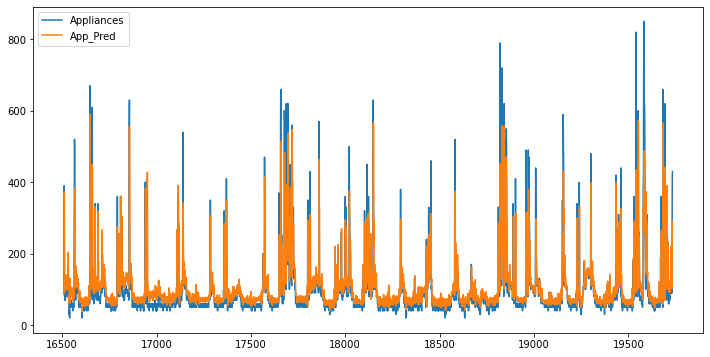

In [65]:
df_final[['Appliances', 'App_Pred']].plot()